In [68]:
pwd

'/content/drive/My Drive/공모전/데이콘 농산물'

In [69]:
%cd '/content/drive/MyDrive/공모전/데이콘 농산물'

/content/drive/MyDrive/공모전/데이콘 농산물


In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import os

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [213]:
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore

In [214]:
seed_everything(42)

In [215]:
data = pd.read_csv('./data/public_data/train.csv')

In [216]:
data.columns

Index(['date', '요일', '배추_거래량(kg)', '배추_가격(원/kg)', '무_거래량(kg)', '무_가격(원/kg)',
       '양파_거래량(kg)', '양파_가격(원/kg)', '건고추_거래량(kg)', '건고추_가격(원/kg)',
       '마늘_거래량(kg)', '마늘_가격(원/kg)', '대파_거래량(kg)', '대파_가격(원/kg)',
       '얼갈이배추_거래량(kg)', '얼갈이배추_가격(원/kg)', '양배추_거래량(kg)', '양배추_가격(원/kg)',
       '깻잎_거래량(kg)', '깻잎_가격(원/kg)', '시금치_거래량(kg)', '시금치_가격(원/kg)',
       '미나리_거래량(kg)', '미나리_가격(원/kg)', '당근_거래량(kg)', '당근_가격(원/kg)',
       '파프리카_거래량(kg)', '파프리카_가격(원/kg)', '새송이_거래량(kg)', '새송이_가격(원/kg)',
       '팽이버섯_거래량(kg)', '팽이버섯_가격(원/kg)', '토마토_거래량(kg)', '토마토_가격(원/kg)',
       '청상추_거래량(kg)', '청상추_가격(원/kg)', '백다다기_거래량(kg)', '백다다기_가격(원/kg)',
       '애호박_거래량(kg)', '애호박_가격(원/kg)', '캠벨얼리_거래량(kg)', '캠벨얼리_가격(원/kg)',
       '샤인마스캇_거래량(kg)', '샤인마스캇_가격(원/kg)'],
      dtype='object')

In [133]:
# 요일을 0에서 6으로 변환

week_day_map = {}
for i, d in enumerate(data['요일'].unique()):
    week_day_map[d] = i
data['요일'] = data['요일'].map(week_day_map)

In [134]:
data

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,1,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,15019.0,5475.0,92334.0,1704.0,6359.0,1331.0,40028.0,348.0,4374.9,13242.0,16550.5,2339.0,10528.0,1729.0,13885.0,804.0,3853.0,3703.0,15797.0,2576.0,14634.0,1474.0,30950.0,1621.0,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,3,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,141638.0,5210.0,994328.1,1716.0,262615.5,1212.0,1074699.1,345.0,122613.5,9923.0,427435.1,2153.0,82113.5,3960.0,558950.2,794.0,104930.3,4871.0,277326.5,2440.0,159800.0,1750.0,291057.0,1834.0,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,4,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,126207.8,5387.0,787716.0,1715.0,221850.5,1197.0,825681.9,350.0,79055.9,9529.0,334636.8,2220.0,80144.0,3333.0,444353.7,763.0,100699.5,5129.0,218465.2,2437.0,153084.0,1822.0,194626.5,1833.0,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,2020-09-24,6,1856965.0,1839.0,2055640.0,990.0,2281429.2,990.0,2818.4,19101.0,134359.9,4775.0,770271.0,2380.0,440799.7,1868.0,656500.5,1143.0,79508.0,10028.0,69843.5,6329.0,60020.8,4950.0,423233.2,1565.0,94152.5,9206.0,200810.1,2927.0,129997.7,2545.0,142487.0,5587.0,50730.0,4509.0,282212.3,3001.0,313139.7,3426.0,504242.6,3620.0,283196.9,10940.0
1729,2020-09-25,0,1880095.5,1789.0,1879261.0,1011.0,2074513.0,955.0,1887.1,23095.0,126926.0,5039.0,781384.8,2239.0,424009.4,2047.0,716803.2,1090.0,84842.0,10921.0,89315.4,6262.0,124693.1,2595.0,400527.2,1773.0,87127.3,9084.0,222932.0,2994.0,130379.3,2598.0,152575.5,5596.0,54322.0,4178.0,312214.8,2999.0,362741.0,3357.0,479683.1,3618.0,303779.6,10844.0
1730,2020-09-26,1,1661090.9,1760.0,1709385.7,1075.0,2089081.2,961.0,959.0,22510.0,110357.7,5565.0,810812.8,2126.0,414436.4,2095.0,502673.3,1326.0,99449.0,10607.0,124259.5,7123.0,75850.1,4310.0,187076.2,1405.0,102672.0,9198.0,249009.1,2942.0,130047.4,2617.0,176807.0,5262.0,61213.0,3770.0,327395.8,3065.0,390361.2,3092.0,521493.8,3691.0,313295.7,10636.0
1731,2020-09-27,2,25396.0,3066.0,38222.0,1139.0,18240.0,1056.0,60.0,22333.0,620.0,5227.0,18291.4,1866.0,4022.0,798.0,16573.0,998.0,2159.8,12195.0,1091.0,7178.0,676.0,1869.0,60.0,3750.0,0.0,0.0,4766.0,2946.0,2500.0,2573.0,910.0,3781.0,144.0,4076.0,285.0,3707.0,2464.0,3252.0,21717.0,3567.0,9734.0,10699.0


In [218]:
log1 = pd.DataFrame(data.iloc[:,2])
log2 = pd.DataFrame(data.iloc[:,4])
log3 = pd.DataFrame(data.iloc[:,6])
log4 = pd.DataFrame(data.iloc[:,8])
log5 = pd.DataFrame(data.iloc[:,10])
log6 = pd.DataFrame(data.iloc[:,12])
log7 = pd.DataFrame(data.iloc[:,14])
log8 = pd.DataFrame(data.iloc[:,16])
log9 = pd.DataFrame(data.iloc[:,18])
log10 = pd.DataFrame(data.iloc[:,20])
log11 = pd.DataFrame(data.iloc[:,22])
log12 = pd.DataFrame(data.iloc[:,24])
log13 = pd.DataFrame(data.iloc[:,26])
log14 = pd.DataFrame(data.iloc[:,28])
log15 = pd.DataFrame(data.iloc[:,30])
log16 = pd.DataFrame(data.iloc[:,32])
log17 = pd.DataFrame(data.iloc[:,34])
log18 = pd.DataFrame(data.iloc[:,36])
log19 = pd.DataFrame(data.iloc[:,38])
log20 = pd.DataFrame(data.iloc[:,40])
log21 = pd.DataFrame(data.iloc[:,42])

In [219]:
log = pd.concat([log1,log2,log3,log4,log5,log6,log7,log8,log9,log10,log11,log12,log13,log14,log15,log16,log17,log18,log19,log20,log21],axis=1)

In [220]:
log

,배추_거래량(kg),무_거래량(kg),양파_거래량(kg),건고추_거래량(kg),마늘_거래량(kg),대파_거래량(kg),얼갈이배추_거래량(kg),양배추_거래량(kg),깻잎_거래량(kg),시금치_거래량(kg),미나리_거래량(kg),당근_거래량(kg),파프리카_거래량(kg),새송이_거래량(kg),팽이버섯_거래량(kg),토마토_거래량(kg),청상추_거래량(kg),백다다기_거래량(kg),애호박_거래량(kg),캠벨얼리_거래량(kg),샤인마스캇_거래량(kg)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80860.0,80272.0,122787.5,3.0,15019.0,92334.0,6359.0,40028.0,4374.9,16550.5,10528.0,13885.0,3853.0,15797.0,14634.0,30950.0,5125.0,434.0,19159.0,880.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1422742.5,1699653.7,2315079.0,699.0,141638.0,994328.1,262615.5,1074699.1,122613.5,427435.1,82113.5,558950.2,104930.3,277326.5,159800.0,291057.0,38525.5,500702.0,620539.0,2703.8,0.0
4,1167241.0,1423482.3,2092960.1,1112.6,126207.8,787716.0,221850.5,825681.9,79055.9,334636.8,80144.0,444353.7,100699.5,218465.2,153084.0,194626.5,32615.0,147638.0,231958.0,8810.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,1856965.0,2055640.0,2281429.2,2818.4,134359.9,770271.0,440799.7,656500.5,79508.0,69843.5,60020.8,423233.2,94152.5,200810.1,129997.7,142487.0,50730.0,282212.3,313139.7,504242.6,283196.9
1729,1880095.5,1879261.0,2074513.0,1887.1,126926.0,781384.8,424009.4,716803.2,84842.0,89315.4,124693.1,400527.2,87127.3,222932.0,130379.3,152575.5,54322.0,312214.8,362741.0,479683.1,303779.6
1730,1661090.9,1709385.7,2089081.2,959.0,110357.7,810812.8,414436.4,502673.3,99449.0,124259.5,75850.1,187076.2,102672.0,249009.1,130047.4,176807.0,61213.0,327395.8,390361.2,521493.8,313295.7
1731,25396.0,38222.0,18240.0,60.0,620.0,18291.4,4022.0,16573.0,2159.8,1091.0,676.0,60.0,0.0,4766.0,2500.0,910.0,144.0,285.0,2464.0,21717.0,9734.0


In [234]:
df_log = np.log(log+1)

In [235]:
df_log

,배추_거래량(kg),무_거래량(kg),양파_거래량(kg),건고추_거래량(kg),마늘_거래량(kg),대파_거래량(kg),얼갈이배추_거래량(kg),양배추_거래량(kg),깻잎_거래량(kg),시금치_거래량(kg),미나리_거래량(kg),당근_거래량(kg),파프리카_거래량(kg),새송이_거래량(kg),팽이버섯_거래량(kg),토마토_거래량(kg),청상추_거래량(kg),백다다기_거래량(kg),애호박_거래량(kg),캠벨얼리_거래량(kg),샤인마스캇_거래량(kg)
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,11.300487,11.293189,11.718219,1.386294,9.617138,11.433179,8.757784,10.597359,8.383867,9.714232,9.261889,9.538636,8.256867,9.667639,9.591171,10.340161,8.542081,6.075346,9.860580,6.781058,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,14.168098,14.345936,14.654955,6.551080,11.861037,13.809824,12.478450,13.887552,11.716801,12.965560,11.315870,13.233817,11.561061,12.532954,11.981685,12.581278,10.559102,13.123768,13.338345,7.902783,0.000000
4,13.970154,14.168617,14.554090,7.015353,11.745693,13.576894,12.309764,13.623966,11.277923,12.720804,11.291593,13.004378,11.519906,12.294387,11.938749,12.178843,10.392558,11.902525,12.354316,9.083756,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,14.434455,14.536098,14.640313,7.944279,11.808285,13.554499,12.996348,13.394680,11.283626,11.154027,11.002463,12.955681,11.452682,12.210120,11.775280,11.867013,10.834292,12.550418,12.654408,13.130815,12.553901
1729,14.446834,14.446390,14.545237,7.543326,11.751367,13.568824,12.957513,13.482558,11.348558,11.399940,11.733619,12.900539,11.375137,12.314627,11.778211,11.935421,10.902703,12.651450,12.801447,13.080883,12.624061
1730,14.322986,14.351645,14.552235,6.866933,11.611491,13.605794,12.934677,13.127698,11.507410,11.730135,11.236527,12.139277,11.539304,12.425249,11.775662,12.082820,11.022131,12.698928,12.874830,13.164455,12.654906
1731,10.142386,10.551193,9.811427,4.110874,6.431331,9.814241,8.299783,9.715590,7.678234,6.995766,6.517671,4.110874,0.000000,8.469472,7.824446,6.814543,4.976734,5.655992,7.809947,9.985897,9.183483


In [223]:
a = pd.DataFrame(data.iloc[:,3])
b = pd.DataFrame(data.iloc[:,5])
c = pd.DataFrame(data.iloc[:,7])
d = pd.DataFrame(data.iloc[:,9])
e = pd.DataFrame(data.iloc[:,11])
f = pd.DataFrame(data.iloc[:,13])
g = pd.DataFrame(data.iloc[:,15])
h = pd.DataFrame(data.iloc[:,17])
i = pd.DataFrame(data.iloc[:,19])
j = pd.DataFrame(data.iloc[:,21])
k = pd.DataFrame(data.iloc[:,23])
l = pd.DataFrame(data.iloc[:,25])
n = pd.DataFrame(data.iloc[:,27])
m = pd.DataFrame(data.iloc[:,29])
o = pd.DataFrame(data.iloc[:,31])
p = pd.DataFrame(data.iloc[:,33])
q = pd.DataFrame(data.iloc[:,35])
r = pd.DataFrame(data.iloc[:,37])
s = pd.DataFrame(data.iloc[:,39])
t = pd.DataFrame(data.iloc[:,41])
u = pd.DataFrame(data.iloc[:,43])

In [224]:
price = pd.concat([a,b,c,d,e,f,g,h,i,j,k,l,n,m,o,p,q,r,s,t,u],axis=1)

In [225]:
price

,배추_가격(원/kg),무_가격(원/kg),양파_가격(원/kg),건고추_가격(원/kg),마늘_가격(원/kg),대파_가격(원/kg),얼갈이배추_가격(원/kg),양배추_가격(원/kg),깻잎_가격(원/kg),시금치_가격(원/kg),미나리_가격(원/kg),당근_가격(원/kg),파프리카_가격(원/kg),새송이_가격(원/kg),팽이버섯_가격(원/kg),토마토_가격(원/kg),청상추_가격(원/kg),백다다기_가격(원/kg),애호박_가격(원/kg),캠벨얼리_가격(원/kg),샤인마스캇_가격(원/kg)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,329.0,360.0,1281.0,11000.0,5475.0,1704.0,1331.0,348.0,13242.0,2339.0,1729.0,804.0,3703.0,2576.0,1474.0,1621.0,9235.0,2109.0,2414.0,2014.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,478.0,382.0,1235.0,4464.0,5210.0,1716.0,1212.0,345.0,9923.0,2153.0,3960.0,794.0,4871.0,2440.0,1750.0,1834.0,7631.0,2046.0,2018.0,3885.0,0.0
4,442.0,422.0,1213.0,4342.0,5387.0,1715.0,1197.0,350.0,9529.0,2220.0,3333.0,763.0,5129.0,2437.0,1822.0,1833.0,6926.0,2268.0,2178.0,2853.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,1839.0,990.0,990.0,19101.0,4775.0,2380.0,1868.0,1143.0,10028.0,6329.0,4950.0,1565.0,9206.0,2927.0,2545.0,5587.0,4509.0,3001.0,3426.0,3620.0,10940.0
1729,1789.0,1011.0,955.0,23095.0,5039.0,2239.0,2047.0,1090.0,10921.0,6262.0,2595.0,1773.0,9084.0,2994.0,2598.0,5596.0,4178.0,2999.0,3357.0,3618.0,10844.0
1730,1760.0,1075.0,961.0,22510.0,5565.0,2126.0,2095.0,1326.0,10607.0,7123.0,4310.0,1405.0,9198.0,2942.0,2617.0,5262.0,3770.0,3065.0,3092.0,3691.0,10636.0
1731,3066.0,1139.0,1056.0,22333.0,5227.0,1866.0,798.0,998.0,12195.0,7178.0,1869.0,3750.0,0.0,2946.0,2573.0,3781.0,4076.0,3707.0,3252.0,3567.0,10699.0


In [232]:
# 각 컬럼 최대값으로 나눈 후 정규화

norm = price.max(0)
price = price / norm

In [233]:
price

,배추_가격(원/kg),무_가격(원/kg),양파_가격(원/kg),건고추_가격(원/kg),마늘_가격(원/kg),대파_가격(원/kg),얼갈이배추_가격(원/kg),양배추_가격(원/kg),깻잎_가격(원/kg),시금치_가격(원/kg),미나리_가격(원/kg),당근_가격(원/kg),파프리카_가격(원/kg),새송이_가격(원/kg),팽이버섯_가격(원/kg),토마토_가격(원/kg),청상추_가격(원/kg),백다다기_가격(원/kg),애호박_가격(원/kg),캠벨얼리_가격(원/kg),샤인마스캇_가격(원/kg)
0,0.5000,0.500000,0.50000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.50000,0.500000
1,0.5329,0.632353,0.82025,0.532195,0.926734,0.767756,0.721317,0.608142,0.962167,0.583452,0.603286,0.607200,0.641780,0.822000,0.686535,0.610302,0.755534,0.699188,0.678076,0.54028,0.500000
2,0.5000,0.500000,0.50000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.50000,0.500000
3,0.5478,0.640441,0.80875,0.513065,0.906080,0.769642,0.701530,0.607209,0.846328,0.576816,0.736559,0.605867,0.686500,0.805000,0.721463,0.624796,0.711151,0.693238,0.648864,0.57770,0.500000
4,0.5442,0.655147,0.80325,0.512708,0.919875,0.769485,0.699036,0.608763,0.832577,0.579207,0.699104,0.601733,0.696378,0.804625,0.730575,0.624728,0.691644,0.714205,0.660667,0.55706,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,0.6839,0.863971,0.74750,0.555904,0.872175,0.873979,0.810609,0.855190,0.849993,0.725810,0.795699,0.708667,0.852477,0.865875,0.822070,0.880171,0.624765,0.783434,0.752729,0.57240,0.636750
1729,0.6789,0.871691,0.73875,0.567594,0.892751,0.851823,0.840372,0.838720,0.881160,0.723419,0.655018,0.736400,0.847806,0.874250,0.828778,0.880784,0.615606,0.783245,0.747639,0.57236,0.635550
1730,0.6760,0.895221,0.74025,0.565882,0.933749,0.834067,0.848354,0.912057,0.870201,0.754139,0.757467,0.687333,0.852171,0.867750,0.831182,0.858057,0.604317,0.789479,0.728091,0.57382,0.632950
1731,0.8066,0.918750,0.76400,0.565364,0.907405,0.793212,0.632690,0.810131,0.925625,0.756101,0.611649,1.000000,0.500000,0.868250,0.825614,0.757281,0.612784,0.850113,0.739894,0.57134,0.633738


In [145]:
data = data.iloc[:,:2]

In [146]:
data

,date,요일
0,2016-01-01,0
1,2016-01-02,1
2,2016-01-03,2
3,2016-01-04,3
4,2016-01-05,4
...,...,...
1728,2020-09-24,6
1729,2020-09-25,0
1730,2020-09-26,1
1731,2020-09-27,2


In [147]:
data = pd.concat([data,df_log,price],axis=1)

In [148]:
data = data[['date', '요일', '배추_거래량(kg)', '배추_가격(원/kg)', '무_거래량(kg)', '무_가격(원/kg)',
       '양파_거래량(kg)', '양파_가격(원/kg)', '건고추_거래량(kg)', '건고추_가격(원/kg)',
       '마늘_거래량(kg)', '마늘_가격(원/kg)', '대파_거래량(kg)', '대파_가격(원/kg)',
       '얼갈이배추_거래량(kg)', '얼갈이배추_가격(원/kg)', '양배추_거래량(kg)', '양배추_가격(원/kg)',
       '깻잎_거래량(kg)', '깻잎_가격(원/kg)', '시금치_거래량(kg)', '시금치_가격(원/kg)',
       '미나리_거래량(kg)', '미나리_가격(원/kg)', '당근_거래량(kg)', '당근_가격(원/kg)',
       '파프리카_거래량(kg)', '파프리카_가격(원/kg)', '새송이_거래량(kg)', '새송이_가격(원/kg)',
       '팽이버섯_거래량(kg)', '팽이버섯_가격(원/kg)', '토마토_거래량(kg)', '토마토_가격(원/kg)',
       '청상추_거래량(kg)', '청상추_가격(원/kg)', '백다다기_거래량(kg)', '백다다기_가격(원/kg)',
       '애호박_거래량(kg)', '애호박_가격(원/kg)', '캠벨얼리_거래량(kg)', '캠벨얼리_가격(원/kg)',
       '샤인마스캇_거래량(kg)', '샤인마스캇_가격(원/kg)']]

In [149]:
device = torch.device("cuda:0") # GPU 사용
target_n = 21 # 맞춰야하는 품목/품종의 수
learning_rate = 5e-4 # 학습률
BATCH_SIZE = 128 # 배치사이즈
EPOCHS = 50 # 총 eopochs
teacher_forcing = False # 교사강요 설정
n_layers = 3 # rnn레이어 층
dropout = 0.2 # 드롭아웃
window_size = 28 # 인코더 시퀀스 길이
future_size = 28 # 디코더 시퀀스 길이
hidden_dim = 128 # rnn 히든차원
save_path = f'pwd' # 모델 저장 경로

In [150]:
x_data = []
y_data = []
for i in range(data.shape[0]-window_size-future_size):
    x = data.iloc[i:i+window_size, 1:].to_numpy()
    y = data.iloc[i+window_size:i+window_size+future_size, 3::2].to_numpy()
    y_0 = np.zeros([1, y.shape[1]]) # 디코더 첫 입력값 추가
    x_data.append(x)
    y_data.append(np.concatenate([y_0, y], axis=0))
x_data = np.array(x_data)
y_data = np.array(y_data)

In [151]:
x_data.shape, y_data.shape

((1677, 28, 43), (1677, 29, 21))

In [152]:
train_test_split = 1
x_train = x_data[:-train_test_split-future_size]
y_train = y_data[:-train_test_split-future_size]
x_val = x_data[-train_test_split:]
y_val = y_data[-train_test_split:]

In [153]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((1648, 28, 43), (1648, 29, 21), (1, 28, 43), (1, 29, 21))

In [154]:
class CustomDataset(Dataset):
    def __init__(self, encoder_input, decoder_input):
        self.encoder_input = encoder_input
        self.decoder_input = decoder_input
        
    def __len__(self):
        return len(self.encoder_input)
    
    def __getitem__(self, i):
        return {
            'encoder_input' : torch.tensor(self.encoder_input[i], dtype=torch.float32),
            'decoder_input' : torch.tensor(self.decoder_input[i], dtype=torch.float32)
        }

In [155]:
train_dataset = CustomDataset(x_train, y_train)
val_dataset = CustomDataset(x_val, y_val)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, num_workers=16, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE, num_workers=16, shuffle=False)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [156]:
sample_batch = next(iter(train_dataloader))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [157]:
sample_batch['encoder_input'].shape, sample_batch['decoder_input'].shape

(torch.Size([128, 28, 43]), torch.Size([128, 29, 21]))

In [158]:
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_layers, dropout):
        super().__init__()
        self.n_layers = n_layers
        
        self.rnn = nn.GRU(input_dim, hidden_dim, n_layers, dropout=dropout)
        self.dropout = nn.Dropout(dropout)

    def forward(self, inp_seq):
        inp_seq = inp_seq.permute(1,0,2)
        outputs, hidden = self.rnn(inp_seq)
        
        return outputs, hidden

In [159]:
class BahdanauAttention(nn.Module):
    def __init__(self, dec_output_dim, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = nn.Linear(dec_output_dim, units)
        self.W2 = nn.Linear(dec_output_dim, units)
        self.V = nn.Linear(dec_output_dim, 1)

    def forward(self, hidden, enc_output):
        query_with_time_axis = hidden.unsqueeze(1)
        
        score = self.V(torch.tanh(self.W1(query_with_time_axis) + self.W2(enc_output)))
        
        attention_weights = torch.softmax(score, axis=1)
        
        context_vector = attention_weights * enc_output
        context_vector = torch.sum(context_vector, dim=1)

        return context_vector, attention_weights

In [160]:
class Decoder(nn.Module):
    def __init__(self, dec_feature_size, encoder_hidden_dim, output_dim, decoder_hidden_dim, n_layers, dropout, attention):
        super().__init__()
        self.output_dim = output_dim
        self.decoder_hidden_dim = decoder_hidden_dim
        self.n_layers = n_layers
        self.attention = attention
        
        self.layer = nn.Linear(dec_feature_size, encoder_hidden_dim)
        self.rnn = nn.GRU(encoder_hidden_dim*2, decoder_hidden_dim, n_layers, dropout=dropout)
        self.fc_out = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, enc_output, dec_input, hidden):
        dec_input = self.layer(dec_input)
        context_vector, attention_weights = self.attention(hidden, enc_output)
        dec_input = torch.cat([torch.sum(context_vector, dim=0), dec_input], dim=1)
        dec_input = dec_input.unsqueeze(0)
        
        output, hidden = self.rnn(dec_input, hidden)

        prediction = self.fc_out(output.sum(0))
        
        return prediction, hidden

In [161]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, attention):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        
    def forward(self, encoder_input, decoder_input, teacher_forcing=False):
        batch_size = decoder_input.size(0)
        trg_len = decoder_input.size(1)
        
        outputs = torch.zeros(batch_size, trg_len-1, self.decoder.output_dim).to(device)
        enc_output, hidden = self.encoder(encoder_input)
        
        dec_input = decoder_input[:, 0]
        for t in range(1, trg_len):
            output, hidden = self.decoder(enc_output, dec_input, hidden)
            outputs[:, t-1] = output
            if teacher_forcing == True:
                dec_input = decoder_input[:, t]
            else:
                dec_input = output
        
        return outputs

In [162]:
encoder = Encoder(input_dim=x_data.shape[-1], hidden_dim=hidden_dim, n_layers=n_layers, dropout=dropout)
attention = BahdanauAttention(dec_output_dim=hidden_dim, units=hidden_dim)
decoder = Decoder(
    dec_feature_size=target_n, encoder_hidden_dim=hidden_dim, output_dim=target_n,
    decoder_hidden_dim=hidden_dim, n_layers=n_layers, dropout=dropout,
    attention = attention
)

model = Seq2Seq(encoder, decoder, attention)
model = model.to(device)

In [163]:
def my_custom_metric(pred, true):
    pred = pred[:, [6, 13, 27]]
    true = true[:, [6, 13, 27]]
    target = torch.where(true!=0)
    true = true[target]
    pred = pred[target]
    score = torch.mean(torch.abs((true-pred))/(true))
    
    return score

In [164]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.L1Loss() # mae
custom_metric = my_custom_metric

In [165]:
def train_step(batch_item, epoch, batch, training, teacher_forcing):
    encoder_input = batch_item['encoder_input'].to(device)
    decoder_input = batch_item['decoder_input'].to(device)
    if training is True:
        model.train()
        optimizer.zero_grad()
        with torch.cuda.amp.autocast():
            output = model(encoder_input, decoder_input, teacher_forcing)
            loss = criterion(output, decoder_input[:,1:])
            score = custom_metric(output, decoder_input[:,1:])
        loss.backward()
        optimizer.step()
        
        return loss, score
    else:
        model.eval()
        with torch.no_grad():
            output = model(encoder_input, decoder_input, False)
            loss = criterion(output, decoder_input[:,1:])
            score = custom_metric(output, decoder_input[:,1:])
        return loss, score

In [166]:
loss_plot, val_loss_plot = [], []
score_plot, val_score_plot = [], []

for epoch in range(EPOCHS):
    total_loss, total_val_loss = 0, 0
    total_score, total_val_score = 0, 0
    
    tqdm_dataset = tqdm(enumerate(train_dataloader))
    training = True
    for batch, batch_item in tqdm_dataset:
        batch_loss, batch_score = train_step(batch_item, epoch, batch, training, teacher_forcing)
        total_loss += batch_loss
        total_score += batch_score
        
        tqdm_dataset.set_postfix({
            'Epoch': epoch + 1,
            'Loss': '{:06f}'.format(batch_loss.item()),
            'Total Loss' : '{:06f}'.format(total_loss/(batch+1)),
            'Score': '{:06f}'.format(batch_score.item()),
            'Total Score' : '{:06f}'.format(total_score/(batch+1)),
        })
    loss_plot.append(total_loss/(batch+1))
    score_plot.append(total_score/(batch+1))
    
    tqdm_dataset = tqdm(enumerate(val_dataloader))
    training = False
    for batch, batch_item in tqdm_dataset:
        batch_loss, batch_val_score = train_step(batch_item, epoch, batch, training, teacher_forcing)
        total_val_loss += batch_loss
        total_val_score += batch_val_score
        
        tqdm_dataset.set_postfix({
            'Epoch': epoch + 1,
            'Val Loss': '{:06f}'.format(batch_loss.item()),
            'Total Val Loss' : '{:06f}'.format(total_val_loss/(batch+1)),
            'Val Score': '{:06f}'.format(batch_val_score.item()),
            'Total Val Score' : '{:06f}'.format(total_val_score/(batch+1)),
        })
    val_loss_plot.append(total_val_loss/(batch+1))
    val_score_plot.append(total_val_score/(batch+1))
    
    if np.min(val_loss_plot) == val_loss_plot[-1]:
        torch.save(model, save_path)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
13it [00:04,  2.79it/s, Epoch=1, Loss=0.140641, Total Loss=0.171344, Score=0.378043, Total Score=0.544664]
1it [00:00,  1.99it/s, Epoch=1, Val Loss=0.229355, Total Val Loss=0.229355, Val Score=0.433559, Total Val Score=0.433559]
13it [00:04,  2.71it/s, Epoch=2, Loss=0.123355, Total Loss=0.129432, Score=0.339424, Total Score=0.383166]
1it [00:00,  2.08it/s, Epoch=2, Val Loss=0.208369, Total Val Loss=0.208369, Val Score=0.413648, Total Val Score=0.413648]
13it [00:04,  2.74it/s, Epoch=3, Loss=0.119953, Total Loss=0.123154, Score=0.474163, 

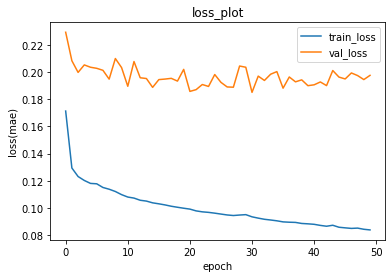

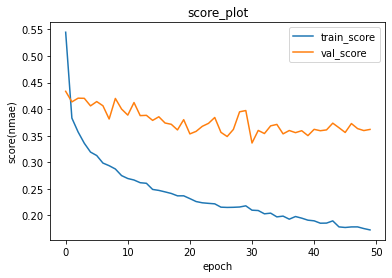

In [167]:
plt.plot(loss_plot, label='train_loss')
plt.plot(val_loss_plot, label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss(mae)')
plt.title('loss_plot')
plt.legend()
plt.show()

plt.plot(score_plot, label='train_score')
plt.plot(val_score_plot, label='val_score')
plt.xlabel('epoch')
plt.ylabel('score(nmae)')
plt.title('score_plot')
plt.legend()
plt.show()

In [168]:
model = torch.load(save_path)
model = model.to(device)

In [205]:
def predict(encoder_input):
    model.train()
    encoder_input = encoder_input.to(device)
    decoder_input = torch.zeros([1, future_size+1, target_n], dtype=torch.float32).to(device)
    with torch.no_grad():
        output = model(encoder_input, decoder_input, False)
    return output.cpu()

In [206]:
submission = pd.read_csv('./data/sample_submission.csv')

In [207]:
public_date_list = submission[submission['예측대상일자'].str.contains('2020')]['예측대상일자'].str.split('+').str[0].unique()

In [208]:
data = pd.concat([data3,data2],axis=1)

In [209]:
data

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
1705,2020-09-01,4.0,14.062053,0.2186,14.287848,0.621324,14.461970,0.4560,8.820552,0.150993,12.036149,0.518005,13.466216,0.489943,12.663324,0.566013,13.500606,0.482287,11.493126,0.315650,10.171631,0.501213,10.677465,0.419235,12.663336,0.341067,11.763933,0.311509,12.096554,0.49225,11.638589,0.339408,12.657502,0.429369,10.668141,0.153901,12.698874,0.393842,12.763394,0.260106,13.315514,0.15008,11.410900,0.303700
1706,2020-09-02,5.0,13.950695,0.2300,14.141776,0.671324,14.360196,0.4750,8.377748,0.148991,11.682631,0.798597,13.385318,0.527341,12.717873,0.537080,13.503995,0.493474,11.476026,0.320117,10.011498,0.533395,10.649760,0.393309,12.831226,0.356267,11.817945,0.314725,12.009187,0.49550,11.683002,0.337383,12.717683,0.415759,10.592569,0.188102,12.636466,0.450699,12.655197,0.340661,13.184069,0.14812,11.307786,0.299525
1707,2020-09-03,6.0,13.705281,0.2890,13.734139,0.776471,14.284005,0.4745,7.906732,0.123861,11.329285,0.799221,13.179265,0.678818,12.599577,0.505820,13.405803,0.474208,11.292399,0.327237,10.035278,0.523619,10.642127,0.327001,12.660151,0.381600,11.647052,0.318171,11.975866,0.50475,11.709437,0.326753,12.576460,0.423653,10.612008,0.194964,12.477644,0.516056,12.507932,0.356152,12.745181,0.15524,10.919678,0.305600
1708,2020-09-04,0.0,13.456244,0.2716,13.720990,0.664706,14.220746,0.4800,8.408939,0.146164,11.219385,0.771161,12.792831,0.905091,12.321556,0.504490,12.854935,0.876321,11.206572,0.432221,10.017218,0.531825,10.550593,0.344205,12.465675,0.363467,11.861640,0.329351,12.068759,0.52200,11.757580,0.322703,12.442796,0.457267,10.592205,0.212396,12.432076,0.545712,12.475044,0.383004,12.655300,0.17364,10.943950,0.312975
1709,2020-09-05,1.0,13.914836,0.2658,14.025530,0.673529,14.237921,0.4835,8.547528,0.150121,10.940948,0.785970,13.379589,0.593338,12.536816,0.672431,13.350214,0.559354,11.365040,0.535739,10.117167,0.558013,10.582293,0.460693,12.114506,0.307200,11.736701,0.302627,12.123767,0.50350,11.722843,0.317388,12.832253,0.441753,10.665157,0.251024,12.421233,0.572724,12.419998,0.428888,13.311498,0.15968,11.576938,0.301000
1710,2020-09-06,2.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1711,2020-09-07,3.0,13.790215,0.3228,14.169800,0.744853,14.325769,0.4830,7.575892,0.143565,10.618917,0.785191,13.206267,0.901320,12.493025,0.749584,13.213438,0.738347,11.589609,0.595281,9.905894,0.706722,10.634525,0.646595,12.658915,0.453333,11.515104,0.377977,12.023979,0.52200,11.425132,0.342445,12.613286,0.433587,10.365956,0.388102,12.473011,0.644881,12.441761,0.503688,13.011710,0.16036,11.295810,0.319050
1712,2020-09-08,4.0,13.200888,0.3988,13.978557,0.700000,14.061184,0.4780,8.292799,0.142423,11.212408,0.855183,13.299004,0.797926,12.467371,0.627868,13.468455,0.657551,11.107632,0.586905,10.141437,0.612530,10.735407,0.562844,12.474519,0.440267,11.414863,0.365725,12.024320,0.54175,11.690779,0.437105,12.208250,0.442161,10.655233,0.328445,12.210926,0.684171,12.319655,0.512393,12.739165,0.16188,11.063910,0.309275
1713,2020-09-09,5.0,13.982535,0.3170,14.269834,0.617647,14.467541,0.4990,8.837681,0.141469,11.331894,0.811224,13.189600,0.754243,12.643006,0.572664,13.197270,0.692977,11.141960,0.638908,10.17

In [210]:
outputs = []
troch_norm = torch.tensor(norm.to_numpy()[0::1])
for date in public_date_list:
    test_df = pd.read_csv(f'./data/public_data/test_files/test_{date}.csv')
    data = pd.read_csv('./data/public_data/train.csv')
    data = pd.concat([data, test_df]).iloc[-window_size:]
    week_day_map = {}
    for i, d in enumerate(data['요일'].unique()):
        week_day_map[d] = i
    data['요일'] = data['요일'].map(week_day_map)
    data = data.iloc[:,1:]/norm

    encoder_input = torch.tensor(data.to_numpy(), dtype=torch.float32)
    encoder_input = encoder_input.unsqueeze(0)
    output = predict(encoder_input)*troch_norm
    
    idx = submission[submission['예측대상일자'].str.contains(date)].index
    submission.loc[idx, '배추_가격(원/kg)':] = output[0,[6,13,27]].numpy()

In [ ]:
encoder_input = encoder_input.unsqueeze(0)
encoder_input.shape

torch.Size([1, 28, 43])

In [66]:
troch_norm = torch.tensor(norm.to_numpy()[2::2])
troch_norm.shape

torch.Size([10])

In [67]:
torch.tensor(norm.to_numpy()[0::1])

tensor([  5000.,   1360.,   2000., 170836.,   6415.,   3182.,   3007.,   1609.,
         14326.,  14014.,   8370.,   3750.,  13059.,   4000.,   3951.,   7348.,
         18070.,   5294.,   6778.,  25000.,  40000.], dtype=torch.float64)

In [211]:
encoder_input

tensor([[[0.0886,    nan, 0.2741,  ...,    nan, 0.4480,    nan],
         [0.0927,    nan, 0.2953,  ...,    nan, 0.3860,    nan],
         [0.1199,    nan, 0.3159,  ...,    nan, 0.3538,    nan],
         ...,
         [0.1305,    nan, 0.3766,  ...,    nan, 0.3862,    nan],
         [0.1415,    nan, 0.3630,  ...,    nan, 0.3680,    nan],
         [0.1014,    nan, 0.3499,  ...,    nan, 0.3645,    nan]]])

In [212]:
output

tensor([[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [ ]:
submission.to_csv('로그변환dacon_baseline.csv', index=False)

# 상관관계


In [ ]:
corr = data2.corr(method='pearson')
corr

,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),자동차용경유
배추_거래량(kg),1.000000,0.252138,0.831835,0.417871,0.453282,0.378302,0.160840,0.218057,0.204959,0.558073,0.585994,0.474235,0.522650,0.365250,0.596703,0.418348,0.531096,0.311756,0.359109,0.272443,0.449105,0.487863,0.541863,0.545213,0.519505,0.269004,0.574134,0.530352,0.563532,0.496291,0.205004,0.406641,0.518002,0.228033,0.182778,0.355701,0.521207,0.281118,0.225324,0.222596,0.151728,0.311766,0.124990
배추_가격(원/kg),0.252138,1.000000,0.369021,0.701881,0.283631,0.566080,0.007998,0.334916,0.060414,0.570541,0.448684,0.681748,0.420767,0.772039,0.417611,0.670039,0.415252,0.659126,0.104762,0.664449,0.247773,0.589010,0.353394,0.600299,0.283806,0.540576,0.506689,0.631205,0.484474,0.559816,0.180046,0.555998,0.469286,0.535008,0.115396,0.537879,0.329952,0.559692,0.509896,0.246548,0.395184,0.201157,-0.205206
무_거래량(kg),0.831835,0.369021,1.000000,0.480175,0.631969,0.592416,0.129549,0.334283,0.315876,0.695445,0.845558,0.612626,0.689760,0.537254,0.822069,0.550308,0.695637,0.511892,0.611591,0.318861,0.643808,0.609973,0.782917,0.695035,0.622738,0.557349,0.815861,0.737359,0.793023,0.683003,0.339081,0.624603,0.731317,0.298431,0.283860,0.594755,0.651543,0.538083,0.197582,0.407020,0.168706,0.289855,0.074553
무_가격(원/kg),0.417871,0.701881,0.480175,1.000000,0.427492,0.560154,-0.001221,0.290857,0.134143,0.676079,0.592000,0.725889,0.538167,0.683298,0.589137,0.710769,0.522351,0.653419,0.322272,0.521515,0.399415,0.590207,0.459479,0.709096,0.393383,0.538448,0.625426,0.711475,0.623934,0.641749,0.270201,0.620871,0.568484,0.482787,0.210838,0.572943,0.457895,0.530399,0.330408,0.308551,0.253286,0.125378,0.031250
양파_거래량(kg),0.453282,0.283631,0.631969,0.427492,1.000000,0.391037,0.022606,0.310902,0.664899,0.479344,0.724549,0.441398,0.828554,0.418025,0.762890,0.382875,0.785963,0.369198,0.351308,0.241495,0.721882,0.233635,0.740057,0.622025,0.759964,0.387604,0.750628,0.603775,0.770620,0.487694,0.773796,0.430255,0.768019,0.230951,0.769170,0.348540,0.808210,0.317455,0.061091,0.652450,0.064514,0.280865,-0.011197
양파_가격(원/kg),0.378302,0.566080,0.592416,0.560154,0.391037,1.000000,0.080519,0.298423,0.185168,0.786291,0.659545,0.702045,0.449212,0.573615,0.648753,0.618487,0.540550,0.582578,0.541895,0.312604,0.540032,0.543921,0.538604,0.597924,0.404743,0.629157,0.649929,0.737633,0.724865,0.493658,0.262986,0.671165,0.583856,0.320344,0.175276,0.648587,0.433184,0.638227,0.111787,0.349065,0.065588,0.037722,-0.268847
건고추_거래량(kg),0.160840,0.007998,0.129549,-0.001221,0.022606,0.080519,1.000000,0.024610,0.014190,0.092225,0.060004,0.044454,0.023763,0.028440,0.055368,0.031181,0.026572,0.029702,0.067566,0.049644,0.043020,0.095218,0.050989,0.019484,0.055118,0.021792,0.047023,0.069753,0.063832,0.030044,-0.023861,0.004403,0.032334,0.017862,-0.039240,0.031008,0.043181,0.026319,0.029755,-0.026012,0.011759,0.034368,0.044423
건고추_가격(원/kg),0.218057,0.334916,0.334283,0.290857,0.310902,0.298423,0.024610,1.000000,0.158400,0.311141,0.423166,0.308960,0.398731,0.436845,0.370438,0.363870,0.390096,0.395555,0.155219,0.350705,0.294768,0.349556,0.322378,0.450105,0.319401,0.350011,0.464542,0.397534,0.429735,0.394708,0.215966,0.379901,0.486706,0.298807,0.182235,0.403679,0.318726,0.348501,0.196223,0.304936,0.221615,0.286757,0.076492
마늘_거래량(kg),0.204959,0.060414,0.315876,0.134143,0.664899,0.185168,0.014190,0.158400,1.000000,0.087784,0.367396,0.210857,0.512290,0.133341,0.427541,0.137355,0.485046,0.104199,0.162973,0.022893,0.444375,-0.020365,0.444027,0.318129,0.498793,0.131459,0.396200,0.306726,0.43351

In [ ]:
corr.to_csv('상관계수.csv', index=False, encoding='cp949')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic') 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


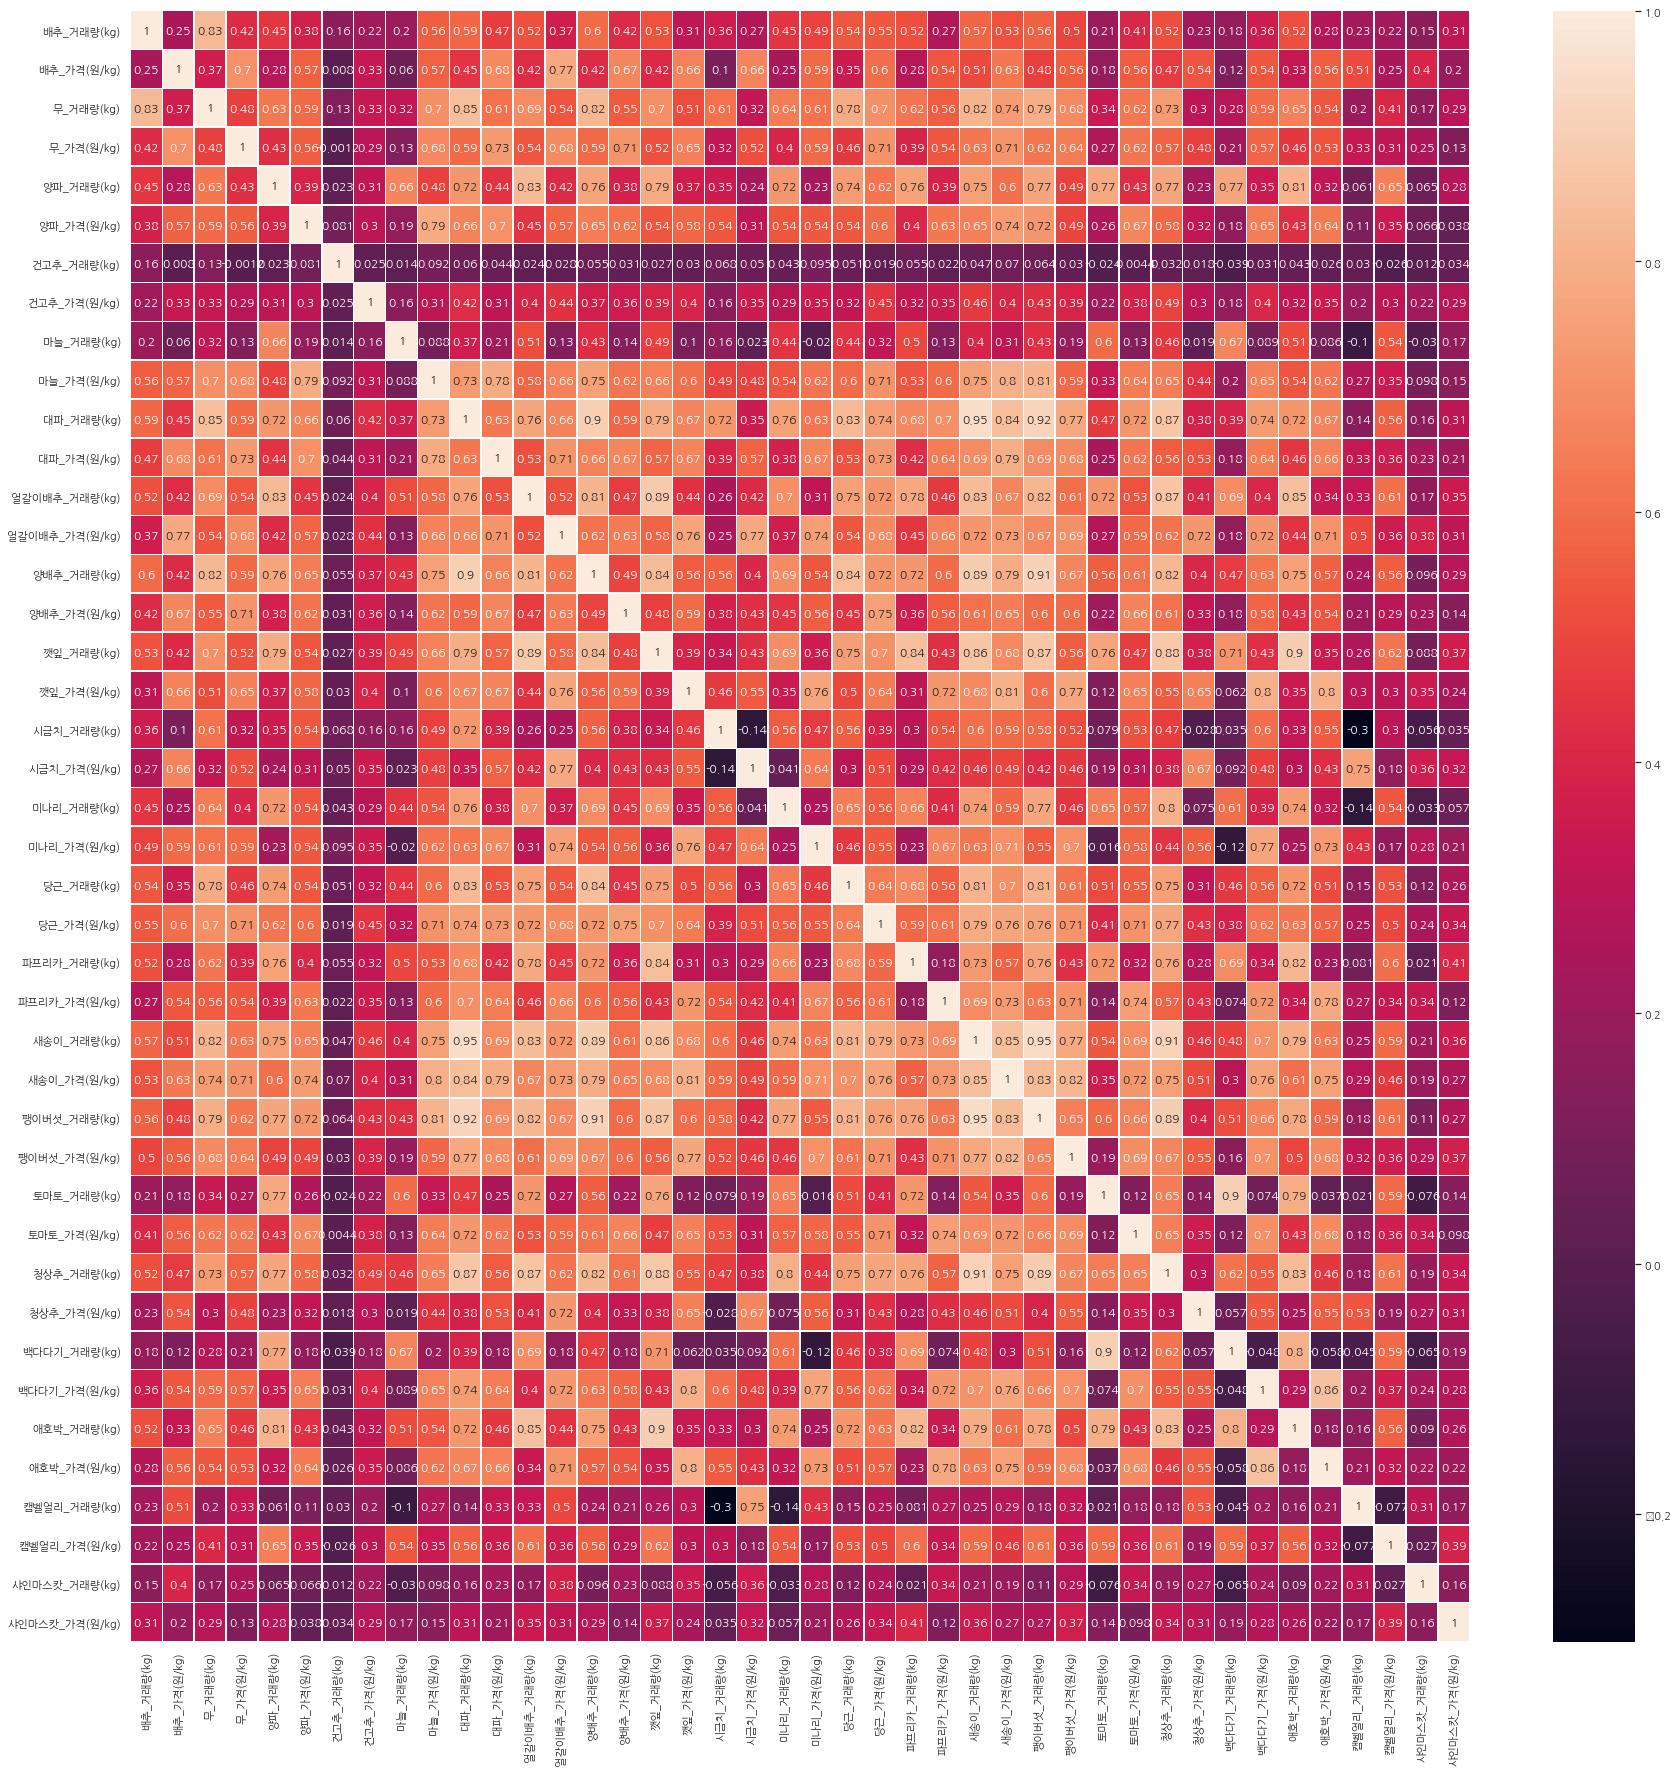

In [ ]:
f, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr, annot=True,linewidths=.5,ax=ax)
plt.show()

# boxplot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def fix_font():
    # From https://HC.Dle.pw, By Jinseo Kim
    # v1.0.0
    import os
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    os.system("apt-get install -y fonts-nanum")
    os.system("fc-cache -fv")
    mpl.font_manager._rebuild()
    findfont = mpl.font_manager.fontManager.findfont
    mpl.font_manager.findfont = findfont
    mpl.backends.backend_agg.findfont = findfont
    plt.rcParams['font.family'] = "NanumBarunGothic"
    plt.rcParams['axes.unicode_minus'] = False
           
fix_font()

FileNotFoundError: ignored

In [ ]:
bc_kg = date_sun['배추_거래량(kg)']
bc_price = date_sun['배추_가격(원/kg)']

In [ ]:
date_sun = data[data.요일 == '일요일']

In [ ]:
date_sun

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
2,2016-01-03,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2016-01-10,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,2016-01-17,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,2016-01-24,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,2016-01-31,일요일,528.0,1048.0,7352.0,767.0,31360.0,1061.0,33.6,7333.0,0.0,0.0,17725.0,1237.0,2944.0,1006.0,4342.0,671.0,964.0,11276.0,4275.0,2232.0,1020.0,985.0,15000.0,1000.0,0.0,0.0,2128.0,3183.0,0.0,0.0,0.0,0.0,716.0,5404.0,160.0,3474.0,16.0,1656.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,2020-08-30,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1710,2020-09-06,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1717,2020-09-13,일요일,0.0,0.0,0.0,0.0,357882.0,1039.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1724,2020-09-20,일요일,1959.0,2925.0,4240.0,760.0,17000.0,1068.0,0.0,0.0,0.0,0.0,2490.0,2218.0,0.0,0.0,0.0,0.0,75.0,12863.0,0.0,0.0,60.0,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,963.0,3375.0,640.0,11477.0


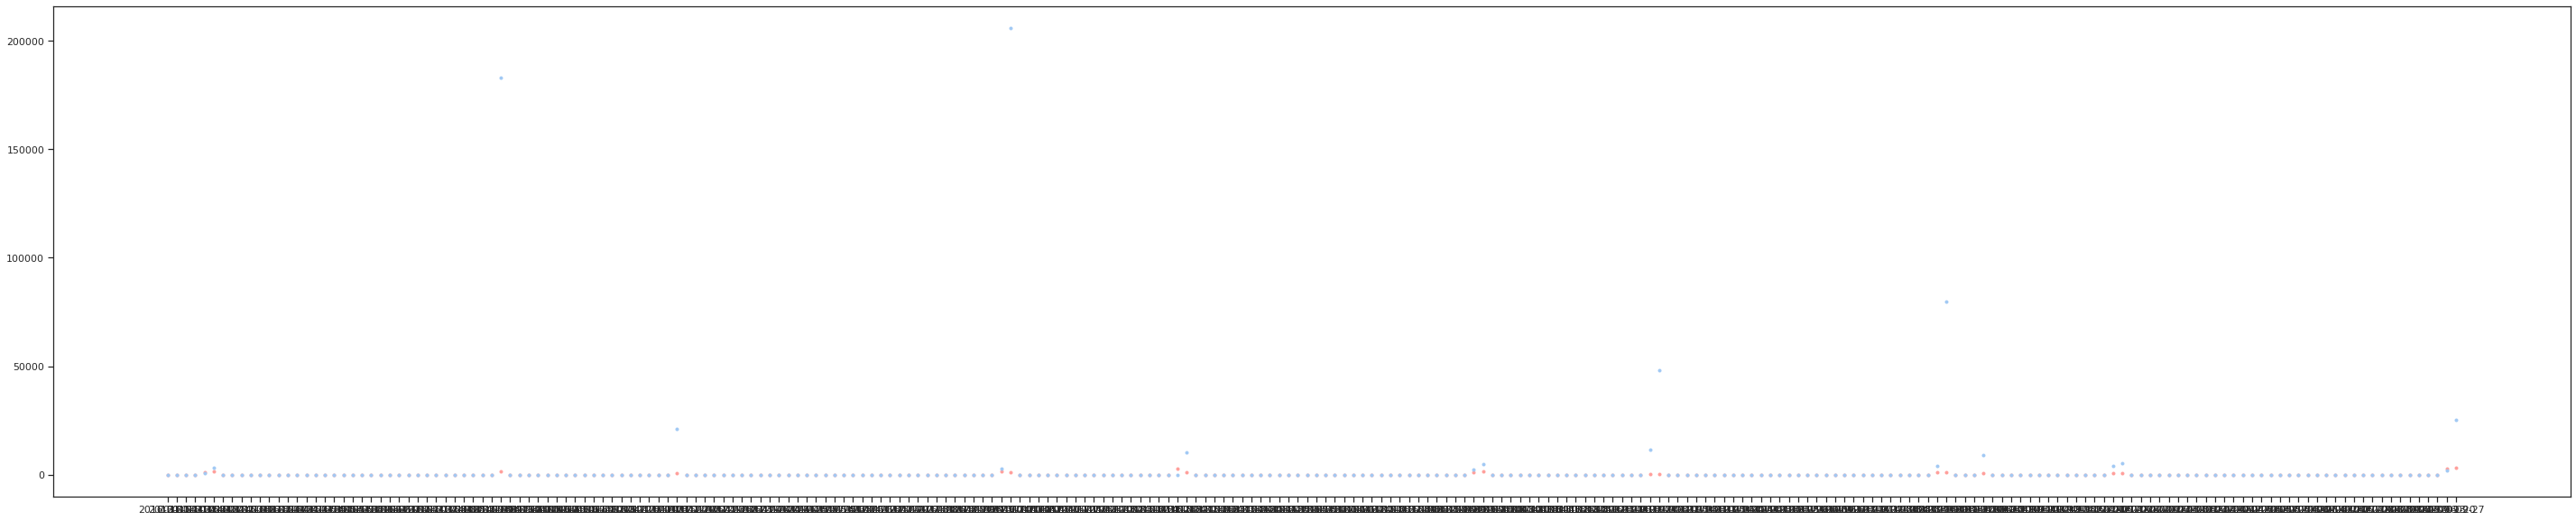

In [ ]:
plt.figure(figsize=(50,10))
plt.plot(date_sun.date, bc_price, '.', color = 'r', alpha=1)
plt.plot(date_sun.date, bc_kg, '.', color = 'b', alpha=1)
plt.show()


In [ ]:
sns.set(style='ticks', palette='pastel')
sns.boxplot(x=date_sun.date, y=bc_price, palette=['b','r'], data=date_sun)

In [ ]:
data.describe()

,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
count,1.733000e+03,1733.000000,1.733000e+03,1733.000000,1.733000e+03,1733.000000,1733.000000,1733.000000,1.733000e+03,1733.000000,1.733000e+03,1733.000000,1733.000000,1733.000000,1.733000e+03,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1.733000e+03,1733.000000,1733.000000,1733.000000,1.733000e+03,1733.000000,1733.000000,1733.000000,1.733000e+03,1733.000000,1733.000000,1733.000000
mean,1.113022e+06,597.120600,1.274344e+06,490.738604,1.656628e+06,652.812464,3578.541546,9537.642239,1.383455e+05,3433.506636,5.705150e+05,1160.815926,256330.243566,902.145413,5.626202e+05,524.885747,80191.161281,4614.092902,151690.438777,2364.220427,70430.079227,2133.585113,275135.965609,914.132718,116573.645759,2951.681477,144348.644432,1873.084824,104171.368090,1424.464512,3.190970e+05,1858.428736,34706.229948,2740.142527,4.234344e+05,1576.184074,302488.655857,1590.833814,1.183558e+05,3214.508944,6690.233756,6989.684939
std,8.376334e+05,410.151434,7.065624e+05,299.193862,9.506928e+05,366.613456,24139.188640,8757.181661,1.431412e+05,1751.773991,2.710508e+05,645.805198,135087.466528,524.265099,2.762762e+05,340.872594,40646.588418,2733.735259,123432.803489,2018.054915,41665.404676,1525.646196,154303.528548,463.428648,66032.314912,1920.583833,67150.304712,859.023863,47220.947213,806.071718,2.398657e+05,1121.949363,16709.614996,2428.808396,3.704087e+05,931.561341,172693.828603,1034.877455,2.465254e+05,2150.772383,24296.175358,7921.093712
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,6.892023e+05,335.000000,1.008677e+06,324.000000,1.334250e+06,467.000000,129.100000,6015.000000,7.392050e+04,2687.000000,5.523516e+05,853.000000,198110.500000,667.000000,5.229527e+05,311.000000,71171.300000,3387.000000,35381.000000,1468.000000,49765.500000,1031.000000,180390.000000,811.000000,86782.200000,1758.000000,148291.800000,1802.000000,109745.000000,1071.000000,1.622534e+05,1173.000000,32331.200000,1471.000000,1.871330e+05,1061.000000,224225.700000,983.000000,9.742000e+02,2053.000000,0.000000,0.000000
50%,1.061471e+06,577.000000,1.374790e+06,453.000000,1.703356e+06,638.000000,544.200000,8607.000000,1.040097e+05,3953.000000,6.485427e+05,1188.000000,289685.000000,918.000000,6.436717e+05,489.000000,88550.900000,4492.000000,139586.400000,1922.000000,72715.600000,2132.000000,311458.000000,958.000000,124327.700000,2833.000000,164255.900000,2079.000000,121304.200000,1454.000000,2.716132e+05,1888.000000,39359.400000,2062.000000,3.218295e+05,1600.000000,320756.000000,1474.000000,4.541600e+03,3318.000000,126.000000,6863.000000
75%,1.385737e+06,805.000000,1.661663e+06,717.000000,2.143338e+06,925.000000,1753.000000,12500.000000,1.533750e+05,4758.000000,7.282878e+05,1551.000000,354815.400000,1174.000000,7.347380e+05,773.000000,103722.000000,5942.000000,241679.200000,2623.000000,97896.400000,3017.000000,382007.200000,1167.000000,159794.500000,4128.000000,178620.000000,2347.000000,130877.000000,1923.000000,4.643230e+05,2634.000000,44789.800000,3561.000000,5.951962e+

# api 제출

In [ ]:
!pip install dacon_submit_api-0.0.4-py3-none-any.whl

Processing ./dacon_submit_api-0.0.4-py3-none-any.whl


In [ ]:
from dacon_submit_api import dacon_submit_api 

result = dacon_submit_api.post_submission_file(
    '로그변환dacon_baseline.csv', 
    '2b2b4c7d394ff289b9d1e3dbe299f5f36b49a86450c61638a0b1ebf35f6480cf', 
    '235801', 
    '다니는당근을좋아해', 
    'DACON_Baseline'
)

{'isSubmitted': True, 'detail': 'Success'}


# LSTM

In [ ]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers,
                            batch_first = True)
        self.fc_1 = nn.Linear(hidden_size, 128)
        self.fc = nn.Linear(128, num_classes)

        self.relu = nn.ReLU()
        
    def forward(self, encoder_input, decoder_input, teacher_forcing=False):
        batch_size = decoder_input.size(0)
        trg_len = decoder_input.size(1)
        
        outputs = torch.zeros(batch_size, trg_len-1, self.decoder.output_dim).to(device)
        enc_output, hidden = self.encoder(encoder_input)
        
        dec_input = decoder_input[:, 0]
        for t in range(1, trg_len):
            output, hidden = self.decoder(enc_output, dec_input, hidden)
            outputs[:, t-1] = output
            if teacher_forcing == True:
                dec_input = decoder_input[:, t]
            else:
                dec_input = output
        
        return outputs

# 품목 분류 당근

In [ ]:
carrot = pd.read_csv('/content/drive/MyDrive/공모전/데이콘 농산물/public_data당근.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
carrot

,SALEDATE,WHSAL_NM,CMP_NM,PUM_NM,KIND_NM,DAN_NM,POJ_NM,SIZE_NM,LV_NM,SAN_NM,DANQ,QTY,COST,TOT_QTY,TOT_AMT
0,20160109,인천삼산도매,부평농산,당근,세척당근(수입),kg,상자,.,특,중국,10.0,50.0,10000.0,500.0,500000.0
1,20160109,인천삼산도매,부평농산,당근,세척당근(수입),kg,상자,.,특,중국,10.0,30.0,10000.0,300.0,300000.0
2,20160109,인천삼산도매,부평농산,당근,세척당근(수입),kg,상자,.,특,중국,10.0,20.0,10000.0,200.0,200000.0
3,20160109,인천삼산도매,부평농산,당근,기타당근,kg,상자,.,특,제주 제주시,20.0,3.0,9000.0,60.0,27000.0
4,20160109,인천삼산도매,부평농산,당근,기타당근,kg,상자,.,특,제주 제주시,20.0,1.0,9000.0,20.0,9000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861203,2020-09-28,인천구월도매,인천농산물,당근,당근(수입),kg,상자,.,상,중국,10.0,20.0,8000.0,200.0,160000.0
861204,2020-09-28,인천구월도매,인천농산물,당근,당근(수입),kg,상자,.,상,중국,10.0,10.0,8000.0,100.0,80000.0
861205,2020-09-28,인천구월도매,인천농산물,당근,당근(수입),kg,상자,.,상,중국,10.0,10.0,8000.0,100.0,80000.0
861206,2020-09-28,인천구월도매,인천농산물,당근,당근(수입),kg,상자,.,상,중국,10.0,30.0,8000.0,300.0,240000.0


In [ ]:
carrot.isnull().sum()

SALEDATE        0
WHSAL_NM        0
CMP_NM          0
PUM_NM          0
KIND_NM         0
DAN_NM          0
POJ_NM          0
SIZE_NM     21069
LV_NM          32
SAN_NM      39454
DANQ            0
QTY             0
COST            0
TOT_QTY         0
TOT_AMT         0
dtype: int64

In [ ]:
carrot.describe()

,DANQ,QTY,COST,TOT_QTY,TOT_AMT
count,861208.000000,861208.000000,8.612080e+05,861208.000000,8.612080e+05
mean,14.040330,41.179579,1.593081e+04,551.430348,5.960888e+05
std,24.251508,130.100675,4.983894e+04,1004.661169,1.295818e+06
min,0.000000,-1200.000000,-3.150000e+04,-16500.000000,-2.205000e+07
25%,10.000000,10.000000,7.600000e+03,100.000000,9.000000e+04
50%,10.000000,20.000000,1.000000e+04,300.000000,2.400000e+05
75%,20.000000,50.000000,2.100000e+04,700.000000,6.400000e+05
max,14000.000000,62460.000000,2.450000e+07,128000.000000,1.344000e+08


In [ ]:
import pandas as pd

In [ ]:
carrot['KIND_NM'].unique()

array(['세척당근(수입)', '기타당근', '당근(수입)', '당근(일반)', '당근', '세척당근', '흙당근',
       '꼬마당근'], dtype=object)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/공모전/데이콘 농산물/public_data새송이.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df1['KIND_NM'].unique()

array(['새송이(일반)', '새송이', '기타', '홍삼새송이'], dtype=object)